<a href="https://colab.research.google.com/github/kn1ght0108/age-dataset-analysis/blob/main/Kaggle_Age_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing important library
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy as sci
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [4]:
# Read the CSV file
age_df = pd.read_csv("/content/drive/MyDrive/CSVData/AgeDataset-V1.csv")
age_df = age_df.drop(labels=['Id', 'Birth year'], axis=1)
age_df = age_df.dropna()

In [5]:
# Set style
sns.set_theme(style='ticks', palette='deep', rc={'patch.linewidth':'0', 'figure.figsize':(8,5)})

In [6]:
def count_other(series, threshold):
  mask = series.value_counts() > threshold
  new_series = series.value_counts()[mask]
  new_series['Other'] = series.value_counts()[~mask].sum()
  return new_series

def writetotxt(filename, series):
  textfile = open(str(filename),'w')
  for txt in series:
    textfile.write('%s\n' % txt)
  textfile.close()

def resplot(x, y, y_pred):
  residue = y - y_pred
  # plt.plot(x, np.zeros(x.size),linestyle='--', color='black')
  fig, ax = plt.subplots(1,1)
  plt.scatter(x, residue)
  ax.axes.axhline(linestyle='--', color='black', linewidth=1.25)

In [7]:
# Data summary
age_df.describe()

,Death year,Age of death
count,45828.000000,45828.000000
mean,1951.331697,59.508205
std,158.544508,18.245002
min,-1145.000000,11.000000
25%,1944.000000,46.000000
50%,1990.000000,61.000000
75%,2008.000000,74.000000
max,2020.000000,122.000000


In [8]:
age_df.corr()

,Death year,Age of death
Death year,1.000000,0.198182
Age of death,0.198182,1.000000


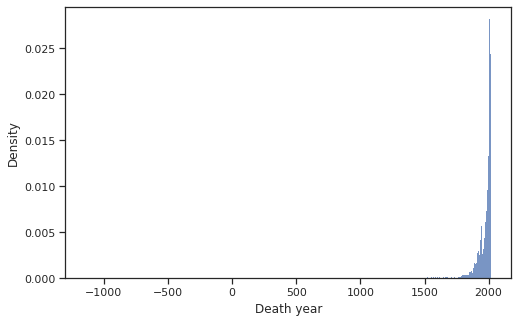

In [9]:
# Death year distribution 
DeathYear = age_df['Death year']
sns.histplot(DeathYear, stat='density')

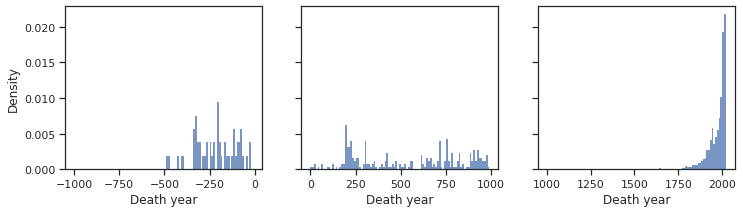

In [10]:
# Death year distribution 
bins_1000bc0ce = np.arange(-1000, 0, 10)
bins_0ce1000ce = np.arange(0, 1000, 10)
bins_1000ce2022ce = np.arange(1000, 2022, 10)
# Make 1x3 subplots
fig, ax = plt.subplots(1, 3, figsize=(12,3), sharey=True)
kde = False
sns.histplot(DeathYear,bins = bins_1000bc0ce, stat='density', kde=kde,ax=ax[0])
sns.histplot(DeathYear,bins = bins_0ce1000ce, stat='density', kde=kde, ax=ax[1])
sns.histplot(DeathYear,bins = bins_1000ce2022ce, stat='density', kde=kde, ax=ax[2])

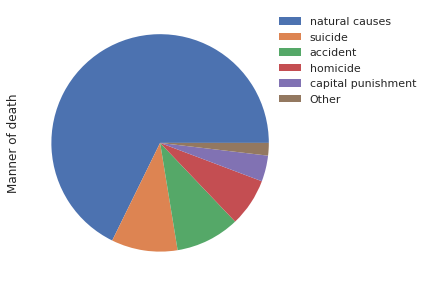

In [11]:
# Manner of death
death = age_df['Manner of death']
count_other(death, 500).plot.pie(labeldistance = None, figsize=(5,5))
plt.legend(loc='best',bbox_to_anchor=(0.9, 1))

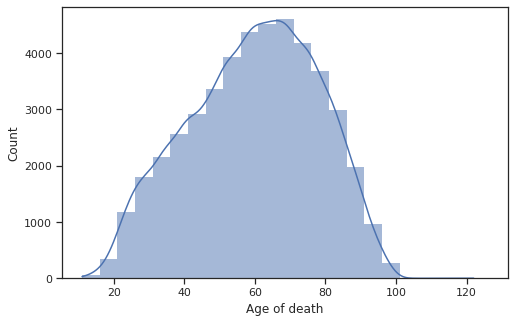

In [12]:
# Age of Death distribution
DeathAge = age_df['Age of death']
bins_deathage = np.arange(DeathAge.min(), DeathAge.max()+5, 5)
sns.histplot(DeathAge,bins = bins_deathage, kde=True)

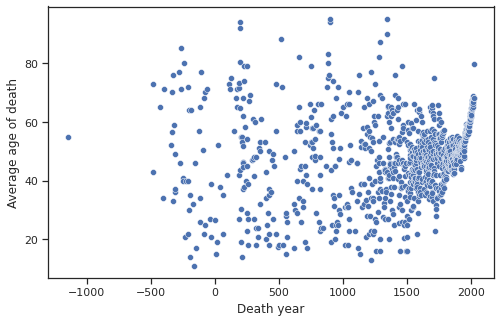

In [13]:
 # Average death age each year from 1900 - 2022
Age_Death = age_df[["Death year","Age of death"]].groupby(["Death year"], as_index=False, sort=True).mean()
Age_Death = Age_Death.rename(columns={'Age of death':'Average age of death'})
x_ad = Age_Death['Death year']
y_ad = Age_Death['Average age of death']
sns.scatterplot(x=x_ad, y=y_ad)


In [14]:
# Making a regression model
X_train, X_test, y_train, y_test = train_test_split(np.array(x_ad), np.array(y_ad), test_size=0.25, random_state=42)
X_train, X_test, y_train, y_test = X_train.reshape(-1,1), X_test.reshape(-1,1), y_train.reshape(-1,1), y_test.reshape(-1,1)
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

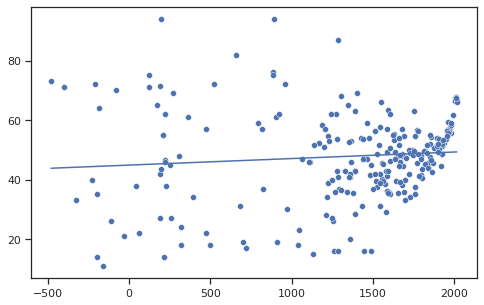

In [15]:
# Linear model test
sns.lineplot(x=np.squeeze(X_test),y=np.squeeze(reg.predict(X_test)))
sns.scatterplot(x=np.squeeze(X_test), y=np.squeeze(y_test))

In [16]:
print('R2: ',reg.score(X_test, y_test))
print('Coefficient: ', np.squeeze(reg.coef_))
print('Intercept: ', np.squeeze(reg.intercept_))

R2:  0.008194754376537938
Coefficient:  0.002197684031097558
Intercept:  44.87385718083119


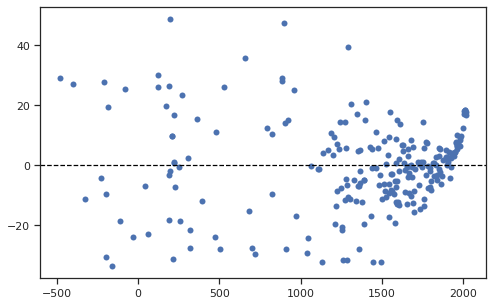

In [17]:
resplot(x=np.squeeze(X_test), y=np.squeeze(y_test), y_pred=np.squeeze(reg.predict(X_test)))

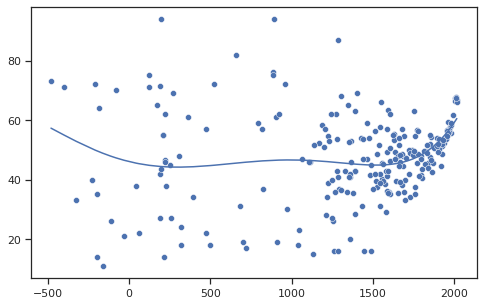

In [18]:
polynomial_model = Pipeline([('stdscale', preprocessing.StandardScaler()), 
                             ('poly', preprocessing.PolynomialFeatures(degree=5)), 
                             ('linear', linear_model.LinearRegression())])
polynomial_model.fit(X_train, y_train)
y_polpred = np.squeeze(polynomial_model.predict(X_test))
sns.lineplot(x=np.squeeze(X_test), y= y_polpred)
sns.scatterplot(x=np.squeeze(X_test), y=np.squeeze(y_test))

In [19]:
print('R2: ',polynomial_model.score(X_test, y_test))
print('Coefficient: ', np.squeeze(polynomial_model['linear'].coef_))
print('Intercept: ', np.squeeze(polynomial_model['linear'].intercept_))

R2:  0.08160717670946172
Coefficient:  [ 0.         -3.13573871  0.49205139  7.07288228  4.28954447  0.64508839]
Intercept:  45.54965268735473


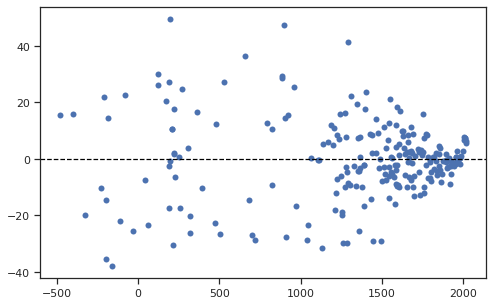

In [20]:
resplot(np.squeeze(X_test), np.squeeze(y_test), y_polpred)